In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
  
%matplotlib inline 
import plotly_express as px
import matplotlib.pyplot as mp
from sklearn import preprocessing


In [3]:
df = pd.read_csv(r'LGHT_ML_covariates_2208.csv')
df = df.rename(columns={'sampling_r': 'period'})
df = df.rename(columns={'cea_name':'CEA'})
df = df.rename(columns={'property_n':'property_name'})
df = df.rename(columns={'core_120_c':'carbon_core_120'})
df = df.rename(columns={'core_120_c':'carbon_core_120'}) # different input for NATR
df = df.rename(columns={'core_carbon_mass':'carbon_core_30'})
df = df.rename(columns={'core_carbo':'carbon_core_30'})
df = df.drop(['field_1','actual_lat','actual_lon'], axis = 1)
df.tail()

,property_name,lower_dept,CEA,strata_nam,period,core_numbe,carbon_core_30,slope,s_twi,ogc_6_corr,...,ogc_3_corr,ogc_2_corr,ogc_1_corr,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,band_12,band_04
413,Lighthouse aggregation,120,2,4,T0,11272,47.744517,1.45862,10.44054,2935584.50,...,6516971.5,4176070.50,716195.0,7717523.5,4.81643,6.33305,31.02665,0.71719,0.36107,0.19825
414,Lighthouse aggregation,120,3,1,T0,11433,44.589934,3.08105,11.27524,2936659.25,...,6522413.0,4180245.75,717985.0,7117547.5,6.76812,8.23138,38.86734,0.84684,0.39063,0.22319
415,Lighthouse aggregation,120,4,2,T0,11703,40.881757,2.78800,8.27299,2931792.50,...,6517763.5,4178652.50,719875.0,7573571.5,2.89664,6.58334,33.20244,0.73263,0.39649,0.17852
416,Lighthouse aggregation,120,2,2,T0,11198,29.997940,5.52904,7.78031,2940607.75,...,6519752.0,4175967.25,713235.0,13355322.0,2.13675,6.93330,35.99577,0.96786,0.30412,0.11360
417,Lighthouse aggregation,120,4,8,T0,12013,29.149205,3.96308,7.28868,2934081.75,...,6521568.5,4180803.25,719795.0,8260097.5,2.09903,5.31456,28.33432,0.60569,0.35570,0.18264


In [4]:
df = df.drop(['property_name','core_numbe', 'CEA', 'strata_nam', 'period'],axis = 1)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lower_dept      418 non-null    int64  
 1   carbon_core_30  418 non-null    float64
 2   slope           418 non-null    float64
 3   s_twi           418 non-null    float64
 4   ogc_6_corr      418 non-null    float64
 5   ogc_5_corr      418 non-null    float64
 6   ogc_4_corr      418 non-null    float64
 7   ogc_3_corr      418 non-null    float64
 8   ogc_2_corr      418 non-null    float64
 9   ogc_1_corr      418 non-null    float64
 10  ndvi_stabl      418 non-null    float64
 11  mrvbf           418 non-null    float64
 12  gamma_th        418 non-null    float64
 13  gamma_tds       418 non-null    float64
 14  gamma_k         418 non-null    float64
 15  band_12         418 non-null    float64
 16  band_04         418 non-null    float64
dtypes: float64(16), int64(1)
memory usa

In [6]:
# get the columns we want
cols_to_norm_df = df.drop('carbon_core_120', axis = 1)
# convert to array
# transform all the data
df_array = np.array(cols_to_norm_df)
df_array

KeyError: "['carbon_core_120'] not found in axis"

In [7]:
target_df = df['carbon_core_120'].reset_index()
target_df

KeyError: 'carbon_core_120'

In [8]:
# df_trans = preprocessing(df_trans['slope'])
d = preprocessing.normalize(df_array, axis = 0)
scaled_df = pd.DataFrame(d , columns = cols_to_norm_df.columns).reset_index()
scaled_df
# merge with only column 1 of df
transformed_df = target_df.merge(scaled_df, on = 'index', how = 'left').drop('index', axis = 1)
transformed_df


NameError: name 'df_array' is not defined

In [9]:
df.columns

Index(['lower_dept', 'carbon_core_30', 'slope', 's_twi', 'ogc_6_corr',
       'ogc_5_corr', 'ogc_4_corr', 'ogc_3_corr', 'ogc_2_corr', 'ogc_1_corr',
       'ndvi_stabl', 'mrvbf', 'gamma_th', 'gamma_tds', 'gamma_k', 'band_12',
       'band_04'],
      dtype='object')

In [10]:
df

,lower_dept,carbon_core_30,slope,s_twi,ogc_6_corr,ogc_5_corr,ogc_4_corr,ogc_3_corr,ogc_2_corr,ogc_1_corr,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,band_12,band_04
0,120,187.420182,2.23361,10.99336,2936735.75,5800540.5,7110095.0,6514505.5,4173359.25,713965.0,8205533.0,4.97170,6.95091,33.22636,0.70270,0.37698,0.17606
1,120,187.085611,2.38263,9.84852,2939067.75,5803139.5,7112265.0,6515664.5,4173197.25,712525.0,9001058.0,4.77333,6.85514,33.91558,0.82512,0.38194,0.17225
2,120,183.629283,2.43179,9.42282,2940140.50,5805168.0,7114705.0,6517863.0,4174564.50,712695.0,9525150.0,4.70799,6.83089,34.45334,0.86298,0.34724,0.18596
3,120,182.168814,1.16199,9.53761,2940425.00,5805880.5,7115655.0,6518795.5,4175230.00,712915.0,9101276.0,3.89595,6.67787,34.29276,0.92242,0.32219,0.13306
4,120,179.812244,4.44443,7.81174,2941611.00,5806935.0,7116295.0,6518850.0,4174684.00,711915.0,9928183.0,2.91523,6.05888,31.98757,0.85630,0.34121,0.15653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,120,47.744517,1.45862,10.44054,2935584.50,5800776.5,7111655.0,6516971.5,4176070.50,716195.0,7717523.5,4.81643,6.33305,31.02665,0.71719,0.36107,0.19825
414,120,44.589934,3.08105,11.27524,2936659.25,5804428.0,7116905.0,6522413.0,4180245.75,717985.0,7117547.5,6.76812,8.23138,38.86734,0.84684,0.39063,0.22319
415,120,40.881757,2.78800,8.27299,2931792.50,5797888.5,7110445.0,6517763.5,4178652.50,719875.0,7573571.5,2.89664,6.58334,33.20244,0.73263,0.39649,0.17852
416,120,29.997940,5.52904,7.78031,2940607.75,5806517.0,7116575.0,6519752.0,4175967.25,713235.0,13355322.0,2.13675,6.93330,35.99577,0.96786,0.30412,0.11360


In [11]:
df

,lower_dept,carbon_core_30,slope,s_twi,ogc_6_corr,ogc_5_corr,ogc_4_corr,ogc_3_corr,ogc_2_corr,ogc_1_corr,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,band_12,band_04
0,120,187.420182,2.23361,10.99336,2936735.75,5800540.5,7110095.0,6514505.5,4173359.25,713965.0,8205533.0,4.97170,6.95091,33.22636,0.70270,0.37698,0.17606
1,120,187.085611,2.38263,9.84852,2939067.75,5803139.5,7112265.0,6515664.5,4173197.25,712525.0,9001058.0,4.77333,6.85514,33.91558,0.82512,0.38194,0.17225
2,120,183.629283,2.43179,9.42282,2940140.50,5805168.0,7114705.0,6517863.0,4174564.50,712695.0,9525150.0,4.70799,6.83089,34.45334,0.86298,0.34724,0.18596
3,120,182.168814,1.16199,9.53761,2940425.00,5805880.5,7115655.0,6518795.5,4175230.00,712915.0,9101276.0,3.89595,6.67787,34.29276,0.92242,0.32219,0.13306
4,120,179.812244,4.44443,7.81174,2941611.00,5806935.0,7116295.0,6518850.0,4174684.00,711915.0,9928183.0,2.91523,6.05888,31.98757,0.85630,0.34121,0.15653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,120,47.744517,1.45862,10.44054,2935584.50,5800776.5,7111655.0,6516971.5,4176070.50,716195.0,7717523.5,4.81643,6.33305,31.02665,0.71719,0.36107,0.19825
414,120,44.589934,3.08105,11.27524,2936659.25,5804428.0,7116905.0,6522413.0,4180245.75,717985.0,7117547.5,6.76812,8.23138,38.86734,0.84684,0.39063,0.22319
415,120,40.881757,2.78800,8.27299,2931792.50,5797888.5,7110445.0,6517763.5,4178652.50,719875.0,7573571.5,2.89664,6.58334,33.20244,0.73263,0.39649,0.17852
416,120,29.997940,5.52904,7.78031,2940607.75,5806517.0,7116575.0,6519752.0,4175967.25,713235.0,13355322.0,2.13675,6.93330,35.99577,0.96786,0.30412,0.11360


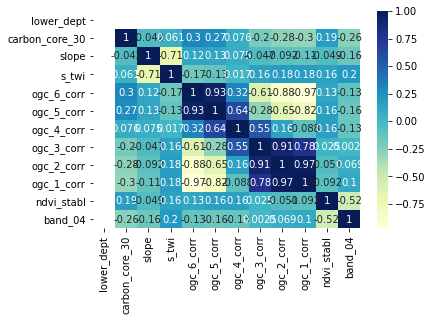

,lower_dept,carbon_core_30,slope,s_twi,ogc_6_corr,ogc_5_corr,ogc_4_corr,ogc_3_corr,ogc_2_corr,ogc_1_corr,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,band_12,band_04
0,120,187.420182,2.23361,10.99336,2936735.75,5800540.5,7110095.0,6514505.5,4173359.25,713965.0,8205533.0,4.97170,6.95091,33.22636,0.70270,0.37698,0.17606
1,120,187.085611,2.38263,9.84852,2939067.75,5803139.5,7112265.0,6515664.5,4173197.25,712525.0,9001058.0,4.77333,6.85514,33.91558,0.82512,0.38194,0.17225
2,120,183.629283,2.43179,9.42282,2940140.50,5805168.0,7114705.0,6517863.0,4174564.50,712695.0,9525150.0,4.70799,6.83089,34.45334,0.86298,0.34724,0.18596
3,120,182.168814,1.16199,9.53761,2940425.00,5805880.5,7115655.0,6518795.5,4175230.00,712915.0,9101276.0,3.89595,6.67787,34.29276,0.92242,0.32219,0.13306
4,120,179.812244,4.44443,7.81174,2941611.00,5806935.0,7116295.0,6518850.0,4174684.00,711915.0,9928183.0,2.91523,6.05888,31.98757,0.85630,0.34121,0.15653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,120,47.744517,1.45862,10.44054,2935584.50,5800776.5,7111655.0,6516971.5,4176070.50,716195.0,7717523.5,4.81643,6.33305,31.02665,0.71719,0.36107,0.19825
414,120,44.589934,3.08105,11.27524,2936659.25,5804428.0,7116905.0,6522413.0,4180245.75,717985.0,7117547.5,6.76812,8.23138,38.86734,0.84684,0.39063,0.22319
415,120,40.881757,2.78800,8.27299,2931792.50,5797888.5,7110445.0,6517763.5,4178652.50,719875.0,7573571.5,2.89664,6.58334,33.20244,0.73263,0.39649,0.17852
416,120,29.997940,5.52904,7.78031,2940607.75,5806517.0,7116575.0,6519752.0,4175967.25,713235.0,13355322.0,2.13675,6.93330,35.99577,0.96786,0.30412,0.11360


In [12]:
# try the heatmap with transformed data
heatmap_df = df.drop( ['gamma_th', 'gamma_tds', 'gamma_k', 'band_12','mrvbf',], axis = 1)#, 'ogc_6', 'ogc_5', 'ogc_4', 'ogc_3', 'ogc_2', 'ogc_1','clay_idx','v_depth'], axis = 1)
dataplot = sns.heatmap(heatmap_df.corr(), cmap="YlGnBu", annot=True)
# # displaying heatmap
mp.show()

# based on heatmap, now choose highly correlated variables
correlated_df = df.drop( [], axis = 1)#, 'ogc_6', 'ogc_5', 'ogc_4', 'ogc_3', 'ogc_2', 'ogc_1','clay_idx','v_depth'], axis = 1)

correlated_df


In [13]:
correlated_df.describe()

,lower_dept,carbon_core_30,slope,s_twi,ogc_6_corr,ogc_5_corr,ogc_4_corr,ogc_3_corr,ogc_2_corr,ogc_1_corr,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,band_12,band_04
count,418.0,418.000000,418.000000,418.000000,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,418.000000,4.180000e+02,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,120.0,115.380761,3.031516,9.079606,2.933963e+06,5.800964e+06,7.113601e+06,6.520154e+06,4.179637e+06,719190.382775,9.032407e+06,3.432771,6.783990,33.326509,0.750127,0.368222,0.175648
std,0.0,28.013869,1.826592,1.773824,4.645611e+03,3.316187e+03,2.201867e+03,3.046942e+03,4.457417e+03,5100.733475,1.432217e+06,2.042987,0.964135,3.500478,0.116812,0.031706,0.022117
min,120.0,29.149205,0.174810,5.714490,2.923187e+06,5.791973e+06,7.108805e+06,6.512341e+06,4.170811e+06,711135.000000,6.825512e+06,0.019210,4.612800,24.802880,0.450780,0.241010,0.113600
25%,120.0,95.735403,1.818083,7.769440,2.929993e+06,5.798672e+06,7.111828e+06,6.518243e+06,4.176033e+06,714615.000000,8.152932e+06,1.885918,6.045727,30.859350,0.675905,0.349250,0.162135
50%,120.0,114.477626,2.997400,8.752895,2.934451e+06,5.800853e+06,7.113530e+06,6.520399e+06,4.179473e+06,718575.000000,8.552756e+06,2.951645,6.754665,33.240515,0.742175,0.367620,0.173140
75%,120.0,134.002905,4.113680,10.357630,2.937955e+06,5.803358e+06,7.115378e+06,6.522087e+06,4.183134e+06,723772.500000,9.504710e+06,4.645220,7.548000,35.771138,0.824730,0.387000,0.187323
max,120.0,187.420182,12.705710,13.521300,2.942706e+06,5.808052e+06,7.117795e+06,6.527545e+06,4.189935e+06,730085.000000,1.855238e+07,8.804720,9.237680,44.579380,1.154010,0.492580,0.272210


array([[<AxesSubplot:title={'center':'lower_dept'}>,
        <AxesSubplot:title={'center':'carbon_core_30'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'s_twi'}>],
       [<AxesSubplot:title={'center':'ogc_6_corr'}>,
        <AxesSubplot:title={'center':'ogc_5_corr'}>,
        <AxesSubplot:title={'center':'ogc_4_corr'}>,
        <AxesSubplot:title={'center':'ogc_3_corr'}>],
       [<AxesSubplot:title={'center':'ogc_2_corr'}>,
        <AxesSubplot:title={'center':'ogc_1_corr'}>,
        <AxesSubplot:title={'center':'ndvi_stabl'}>,
        <AxesSubplot:title={'center':'mrvbf'}>],
       [<AxesSubplot:title={'center':'gamma_th'}>,
        <AxesSubplot:title={'center':'gamma_tds'}>,
        <AxesSubplot:title={'center':'gamma_k'}>,
        <AxesSubplot:title={'center':'band_12'}>],
       [<AxesSubplot:title={'center':'band_04'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

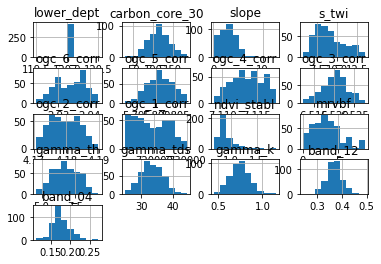

In [14]:
Core_SOC_df = correlated_df
Core_SOC_df.hist()

In [15]:
# Investigating drivers of Core_SOC

In [16]:
g = sns.regplot(x ='topsoil_Cs', y =  'carbon_core_120', data = Core_SOC_df)

KeyError: 'topsoil_Cs'

In [17]:
g = sns.regplot(x ='ogc_3', y =  'carbon_core_120', data = Core_SOC_df)

KeyError: 'ogc_3'

In [18]:
Core_SOC_df.columns

Index(['lower_dept', 'carbon_core_30', 'slope', 's_twi', 'ogc_6_corr',
       'ogc_5_corr', 'ogc_4_corr', 'ogc_3_corr', 'ogc_2_corr', 'ogc_1_corr',
       'ndvi_stabl', 'mrvbf', 'gamma_th', 'gamma_tds', 'gamma_k', 'band_12',
       'band_04'],
      dtype='object')

In [77]:
from pycaret.regression import *

# setup(SOC_percent_df instead of df3 (Core_SOC as target)
# 	R2 from = 0.4959 to 0.5436
exp_reg = setup(Core_SOC_df
,target='carbon_core_30'
,normalize = False 		# this changes r2 from 0.27 to 0.2625 - ie not at all
,session_id=123 
,log_experiment=True
,experiment_name='testing normlizing'
#,ignore_features = ['mrvbf']
#, transformation = True, transform_target = True	# this changes r2 down
# ,feature_interaction = True  	#feature_ratio = True # creation of new features frome existing # r2 from 0.29 to 0.26
,feature_selection = True 	# this changes r2 from 0.27 to 0.29
, feature_selection_threshold = 0.50
, remove_multicollinearity = True
, multicollinearity_threshold = 0.5
#, transform_target = True
# , transformation = True
#, pca = True   			# decrease from 0.29 to 0.1982
)


# try these things
# transformation = True, transform_target = True, 
#                   combine_rare_levels = True, rare_level_threshold = 0.05,
#                   remove_multicollinearity = True, multicollinearity_threshold = 0.95, 

,Description,Value
0,session_id,123
1,Target,carbon_core_30
2,Original Data,"(418, 17)"
3,Missing Values,False
4,Numeric Features,15
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(292, 4)"


In [78]:
compare_models()
# first run of df3 = R2 = 0.48
# ignore features - , ignore_features = ['B04Jun2020'] #,'slope_percent','gamma_u'] R2 = 0.4857
# ,ignore_features = ['B04Jun2020','slope_percent'] #,'gamma_u'] R2 = 0.4857
# ,ignore_features = ['B04Jun2020','slope_percent','gamma_u'] R2 = 0.4857
#, transformation = True, 		R2 from = 0.4857 to 0.4682
# transform_target = True, 		R2 from = 0.4682 to 0.3966
###### transform and transform target don't improve results
# , remove_multicollinearity = True - turn off multicollin	R2 from = 0.4857 to 0.4857
# ,multicollinearity_threshold = 0.95 	R2 from = 0.4857 to 0.4857
# ,multicollinearity_threshold = 0.25	R2 from = 0.4857 to 0.4959
# ,multicollinearity_threshold = 0.05	R2 from = 0.4959 to 0.4959
#,normalize = True, turned off 		R2 from = 0.4959 to 0.4959
# feature_sel_threshold = 0.9 to 0.20	R2 from = 0.4959 to 0.4959

# setup(SOC_percent_df instead of df3 (Core_SOC as target)
# 	R2 from = 0.4959 to 0.5436
# try collinearity threthold - chnaged to 0.5 and see if the model peforms better
# R2 = 0.5441
# try w only 3 input variables 	0.5436
# transform target = True 	R2 from = 0.5436 to 0.5412
# remove outliers 	 	R2 from = 0.5412 0.5365	
# transformation = True 	R2 from = 0.5365 to 	0.5050	
# add CEA and strata name 	R2 from = 0.5050 0.5412

# BODO - Aug 2022 experiments
# , feature_selection_threshold = 0.05 R2 from 0.3181 to 0.318
# adding CEA and strata name    R2 from 0.3181 to 0.318
# turn PCA on			R2 from 0.3181 to 0.318	
# turn feature interaction on	R2 from 0.3181 to 0.1376

# LGHT 30 cm - Normalise = True R2 = 0.16	



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,19.7501,646.6443,25.2606,0.1179,0.2423,0.2025,0.1920
lar,Least Angle Regression,19.7501,646.6451,25.2606,0.1179,0.2423,0.2025,0.0250
ridge,Ridge Regression,20.1757,660.3363,25.5809,0.0958,0.2447,0.2053,0.0350
br,Bayesian Ridge,20.4304,666.3114,25.7001,0.0878,0.2454,0.2076,0.0200
lasso,Lasso Regression,20.4545,666.9489,25.7124,0.0871,0.2455,0.2078,0.0110
en,Elastic Net,20.7004,674.1525,25.8516,0.0778,0.2465,0.2100,0.0120
omp,Orthogonal Matching Pursuit,21.4619,720.4579,26.7360,0.0139,0.2527,0.2166,0.0110
ada,AdaBoost Regressor,20.6992,726.3893,26.7175,0.0134,0.2515,0.2087,0.0580
rf,Random Forest Regressor,21.3874,741.7212,26.9972,-0.0086,0.2545,0.2154,0.1630
et,Extra Trees Regressor,21.4208,751.6382,27.1487,-0.0300,0.2559,0.2161,0.1370


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [79]:
model = create_model('ridge') #, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20.0833,568.1072,23.8350,0.1084,0.2067,0.1768
1,22.4603,754.1530,27.4618,0.2042,0.2803,0.2471
2,19.1922,625.2325,25.0047,-0.0296,0.2539,0.2145
3,20.4663,672.5763,25.9341,0.1955,0.2155,0.1791
4,16.1935,394.0413,19.8505,0.1060,0.1839,0.1540
5,21.9155,736.8621,27.1452,0.0544,0.2714,0.2328
6,20.7195,818.8183,28.6150,-0.0007,0.3154,0.2463
7,19.9469,707.4698,26.5983,0.1771,0.2173,0.1683
8,21.5577,758.7117,27.5447,-0.0919,0.3035,0.2719
9,19.2218,567.3905,23.8200,0.2344,0.1987,0.1627


In [80]:
tuned_model= tune_model(model, n_iter=300, optimize = 'R2')
# 300 iterations instead of 50 makes no difference

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18.7683,501.6313,22.3971,0.2127,0.1949,0.1645
1,21.8935,706.2709,26.5758,0.2548,0.2723,0.2398
2,18.6223,577.8288,24.0381,0.0485,0.2458,0.2067
3,20.1898,645.8982,25.4145,0.2274,0.2102,0.1757
4,14.6410,366.9249,19.1553,0.1675,0.1768,0.1394
5,22.5769,806.1840,28.3934,-0.0345,0.2828,0.2439
6,20.4473,873.9340,29.5624,-0.0681,0.3276,0.2543
7,20.5332,690.3088,26.2737,0.1971,0.2151,0.1738
8,20.9936,738.7716,27.1804,-0.0632,0.2998,0.2656
9,18.9771,553.1808,23.5198,0.2536,0.1951,0.1611


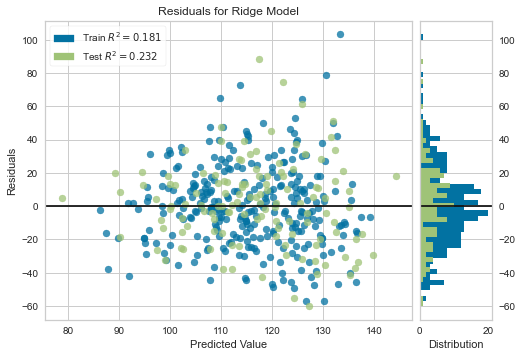

In [81]:
tuned = tuned_model
plot_model(tuned)


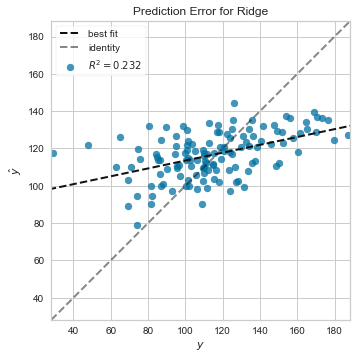

In [82]:
plot_model(tuned, plot = 'error')

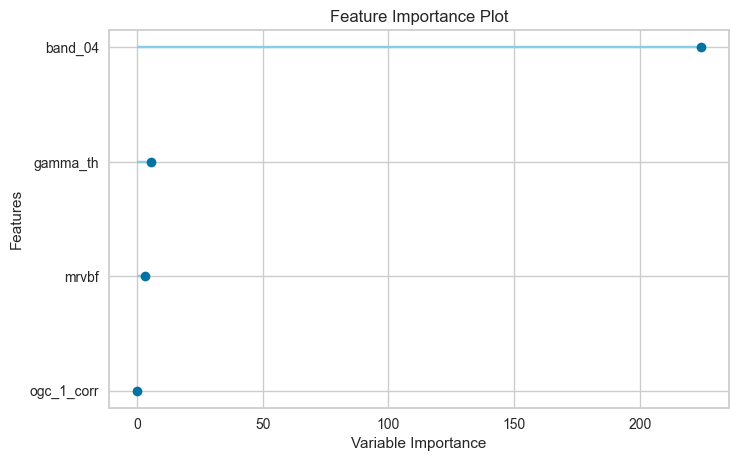

In [83]:
plot_model(tuned, plot = 'feature')

In [35]:
evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [1]:
Core_SOC_df

NameError: name 'Core_SOC_df' is not defined

In [74]:
# Now with normalized = FALSE
from pycaret.regression import *

exp_reg = setup(Core_SOC_df
,target='carbon_core_30'
,normalize = True 		# this changes r2 from 0.27 to 0.2625 - ie not at all
,session_id=123 
,log_experiment=True
,experiment_name='LGHT_0-120_ML'
#,ignore_features = ['mrvbf']
#, transformation = True, transform_target = True	# this changes r2 down
# ,feature_interaction = True  	#feature_ratio = True # creation of new features frome existing # r2 from 0.29 to 0.26
,feature_selection = True 	# this changes r2 from 0.27 to 0.29
, feature_selection_threshold = 0.50
, remove_multicollinearity = True
, multicollinearity_threshold = 0.5
)

,Description,Value
0,session_id,123
1,Target,carbon_core_30
2,Original Data,"(418, 17)"
3,Missing Values,False
4,Numeric Features,15
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(292, 4)"


In [75]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,19.7827,646.9426,25.2673,0.1187,0.2421,0.2026,0.0230
ridge,Ridge Regression,19.7507,646.5519,25.2588,0.1181,0.2423,0.2025,0.0180
lr,Linear Regression,19.7501,646.6450,25.2606,0.1179,0.2423,0.2025,0.1770
lar,Least Angle Regression,19.7501,646.6450,25.2606,0.1179,0.2423,0.2025,0.0140
huber,Huber Regressor,19.6677,646.4565,25.2509,0.1169,0.2431,0.2036,0.0260
lasso,Lasso Regression,19.9143,650.9399,25.3493,0.1146,0.2425,0.2036,0.0260
en,Elastic Net,20.3040,665.9119,25.6451,0.0963,0.2443,0.2066,0.0390
ada,AdaBoost Regressor,20.5635,720.9051,26.6260,0.0204,0.2507,0.2069,0.0980
omp,Orthogonal Matching Pursuit,21.4619,720.4578,26.7360,0.0139,0.2527,0.2166,0.0140
rf,Random Forest Regressor,21.3877,741.5801,26.9946,-0.0084,0.2545,0.2153,0.2440


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

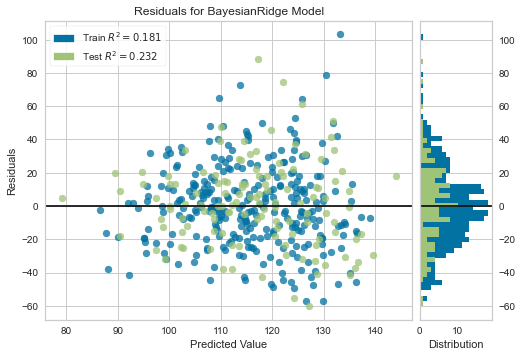

In [76]:
model = create_model('br') #, round = 2)
tuned_model= tune_model(model, n_iter=300, optimize = 'R2')
tuned = tuned_model
plot_model(tuned)